In [43]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import multipolyfit as mpf

ModuleNotFoundError: No module named 'multipolyfit'

In [3]:
data = pd.read_csv('data/mars_2019.txt')

In [4]:
# MSL MISSION SOL; Ls; Mars Year; LOSOD (km^-1); LOSOD_Err (km^-1)
data

,MSL MISSION SOL,Ls,Mars Year,LOSOD,LOSOD_Err
0,100,208.1500,31,0.087053,0.007411
1,101,208.8200,31,0.081568,0.007022
2,105,211.3200,31,0.077329,0.006375
3,117,218.9400,31,0.063592,0.005229
4,119,220.2000,31,0.068652,0.005715
5,122,222.0900,31,0.073220,0.006210
6,124,223.3800,31,0.074782,0.006099
7,300,333.2900,31,0.061332,0.005246
8,306,336.6800,31,0.053804,0.004504
9,311,339.3900,31,0.067679,0.005716


In [5]:
x = [row[1] for (index, row) in data.iterrows()]
y = [row[3] for (index, row) in data.iterrows()]
error = [row[4] for (index, row) in data.iterrows()]
legend = [row[2] for (index, row) in data.iterrows()]

In [6]:
ls_sticks = 0, 45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495, 540
y_sticks = 0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14

In [7]:
degree_sign= u'\N{DEGREE SIGN}'

In [8]:
x_label = [r"{:.0f}".format(_) + degree_sign for _ in ls_sticks]

In [24]:
x_int = [row[1] for (index, row) in data.iterrows()]
y_int = [row[3] for (index, row) in data.iterrows()]

In [25]:
ex_x = [e + 360 for e in x]
ex_n_x = [e[0] for e in zip(ex_x, y) if e[0] <= 540]
ex_n_y = [e[1] for e in zip(ex_x, y) if e[0] <= 540]

In [26]:
x = x_int + ex_n_x
y = y_int + ex_n_y

In [9]:
legend_31 = [row for (index, row) in data.iterrows() if row[2] == 31]
legend_32 = [row for (index, row) in data.iterrows() if row[2] == 32]
legend_33 = [row for (index, row) in data.iterrows() if row[2] == 33]
legend_34 = [row for (index, row) in data.iterrows() if row[2] == 34]

In [12]:
x_31 = [e[1] for e in legend_31]
y_31 = [e[3] for e in legend_31]
error_31 = [e[4] for e in legend_31]


x_32 = [e[1] for e in legend_32]
y_32 = [e[3] for e in legend_32]
error_32 = [e[4] for e in legend_32]

x_33 = [e[1] for e in legend_33]
y_33 = [e[3] for e in legend_33]
error_33 = [e[4] for e in legend_33]

x_34 = [e[1] for e in legend_34]
y_34 = [e[3] for e in legend_34]
error_34 = [e[4] for e in legend_34]

In [13]:
ex_x31 = [e + 360 for e in x_31]
ex_x32 = [e + 360 for e in x_32]
ex_x33 = [e + 360 for e in x_33]
ex_x34 = [e + 360 for e in x_34]

In [14]:
n_legend_31 = [e for e in zip(ex_x31, y_31, error_31) if e[0] <= 540]
n_legend_32 = [e for e in zip(ex_x32, y_32, error_32) if e[0] <= 540]
n_legend_33 = [e for e in zip(ex_x33, y_33, error_33) if e[0] <= 540]
n_legend_34 = [e for e in zip(ex_x34, y_34, error_34) if e[0] <= 540]

In [19]:
n_x31 = [e[0] for e in n_legend_31]
n_y31 = [e[1] for e in n_legend_31]
n_error31 = [e[2] for e in n_legend_31]

n_x32 = [e[0] for e in n_legend_32]
n_y32 = [e[1] for e in n_legend_32]
n_error32 = [e[2] for e in n_legend_32]

n_x33 = [e[0] for e in n_legend_33]
n_y33 = [e[1] for e in n_legend_33]
n_error33 = [e[2] for e in n_legend_33]

n_x34 = [e[0] for e in n_legend_34]
n_y34 = [e[1] for e in n_legend_34]
n_error34 = [e[2] for e in n_legend_34]

In [21]:
n_error33

[0.0066465000000000005,
 0.0062917,
 0.0059845,
 0.0057688,
 0.0057368,
 0.0052929,
 0.005476699999999999,
 0.0054573,
 0.0059924999999999996,
 0.0049244,
 0.0039338,
 0.0027050999999999998,
 0.0029721,
 0.0031820999999999998,
 0.002664,
 0.0029723,
 0.0037838999999999998,
 0.0042854,
 0.004505100000000001,
 0.0052497,
 0.0050994]

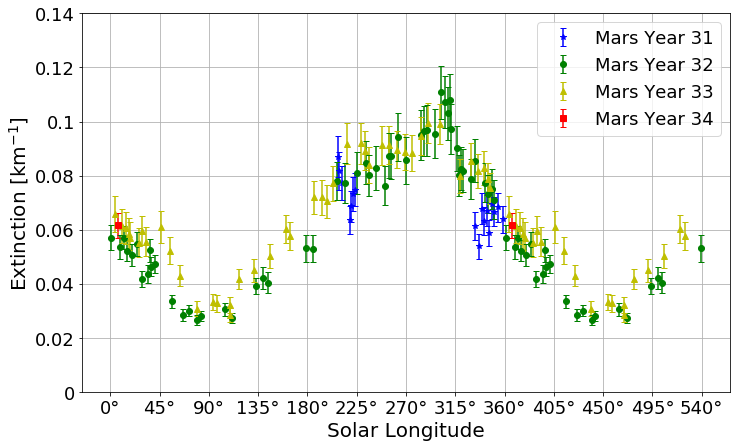

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.errorbar(x_31, y_31, yerr = error_31, fmt = 'b*', label='Mars Year 31', capsize=3)
ax.errorbar(x_32, y_32, yerr = error_32, fmt = 'go', label='Mars Year 32', capsize=3)
ax.errorbar(x_33, y_33, yerr = error_33, fmt = 'y^', label='Mars Year 33', capsize=3)
ax.errorbar(x_34, y_34, yerr = error_34, fmt = 'rs', label='Mars Year 34', capsize=3)

# extended version
ax.errorbar(n_x31, n_y31, yerr = n_error31, fmt = 'b*', capsize=3)
ax.errorbar(n_x32, n_y32, yerr = n_error32, fmt = 'go', capsize=3)
ax.errorbar(n_x33, n_y33, yerr = n_error33, fmt = 'y^', capsize=3)
ax.errorbar(n_x34, n_y34, yerr = n_error34, fmt = 'rs', capsize=3)


ax.legend(loc = 0, fontsize = 18)


ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xticks(ls_sticks)
ax.set_yticks(y_sticks)

ax.set_yticklabels(y_sticks, fontsize = 18)
ax.set_xticklabels(x_label, fontsize = 18)

plt.tight_layout()

plt.xlabel('Solar Longitude', fontsize = 20)
plt.ylabel('Extinction [km$^{-1}$]', fontsize = 20)

plt.show()